## In this case study, we investigate the relationships between Skin Thickness levels, and other features, in order to make make based on this variable, to gain insights into their impact on patient health.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from jupyterthemes import jtplot
jtplot.style('onedork')

In [2]:
df = pd.read_csv("E:\data\diabetes.csv")
df = df.rename(columns={'DiabetesPedigreeFunction': 'PedigreeFunc'})
print(df.info())
print(df.isna().sum())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   PedigreeFunc   768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFunc     0
Age              0
Outcome          0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


 ## **Descriptive Statistics and Analysis**

In [3]:
df.iloc[:, :-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


generate a list with all the columns 

In [4]:
df_columns = df.columns
df_columns = df_columns.tolist()
df_columns 

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'PedigreeFunc',
 'Age',
 'Outcome']

Skewness & Kustosis

In [5]:
skewness = df[df_columns[:-1]].skew()
kurtosis = df[df_columns[:-1]].kurtosis()

print(f'skewness:\n{skewness}, \nkurtosis:\n{kurtosis}')

skewness:
Pregnancies      0.901674
Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
PedigreeFunc     1.919911
Age              1.129597
dtype: float64, 
kurtosis:
Pregnancies      0.159220
Glucose          0.640780
BloodPressure    5.180157
SkinThickness   -0.520072
Insulin          7.214260
BMI              3.290443
PedigreeFunc     5.594954
Age              0.643159
dtype: float64


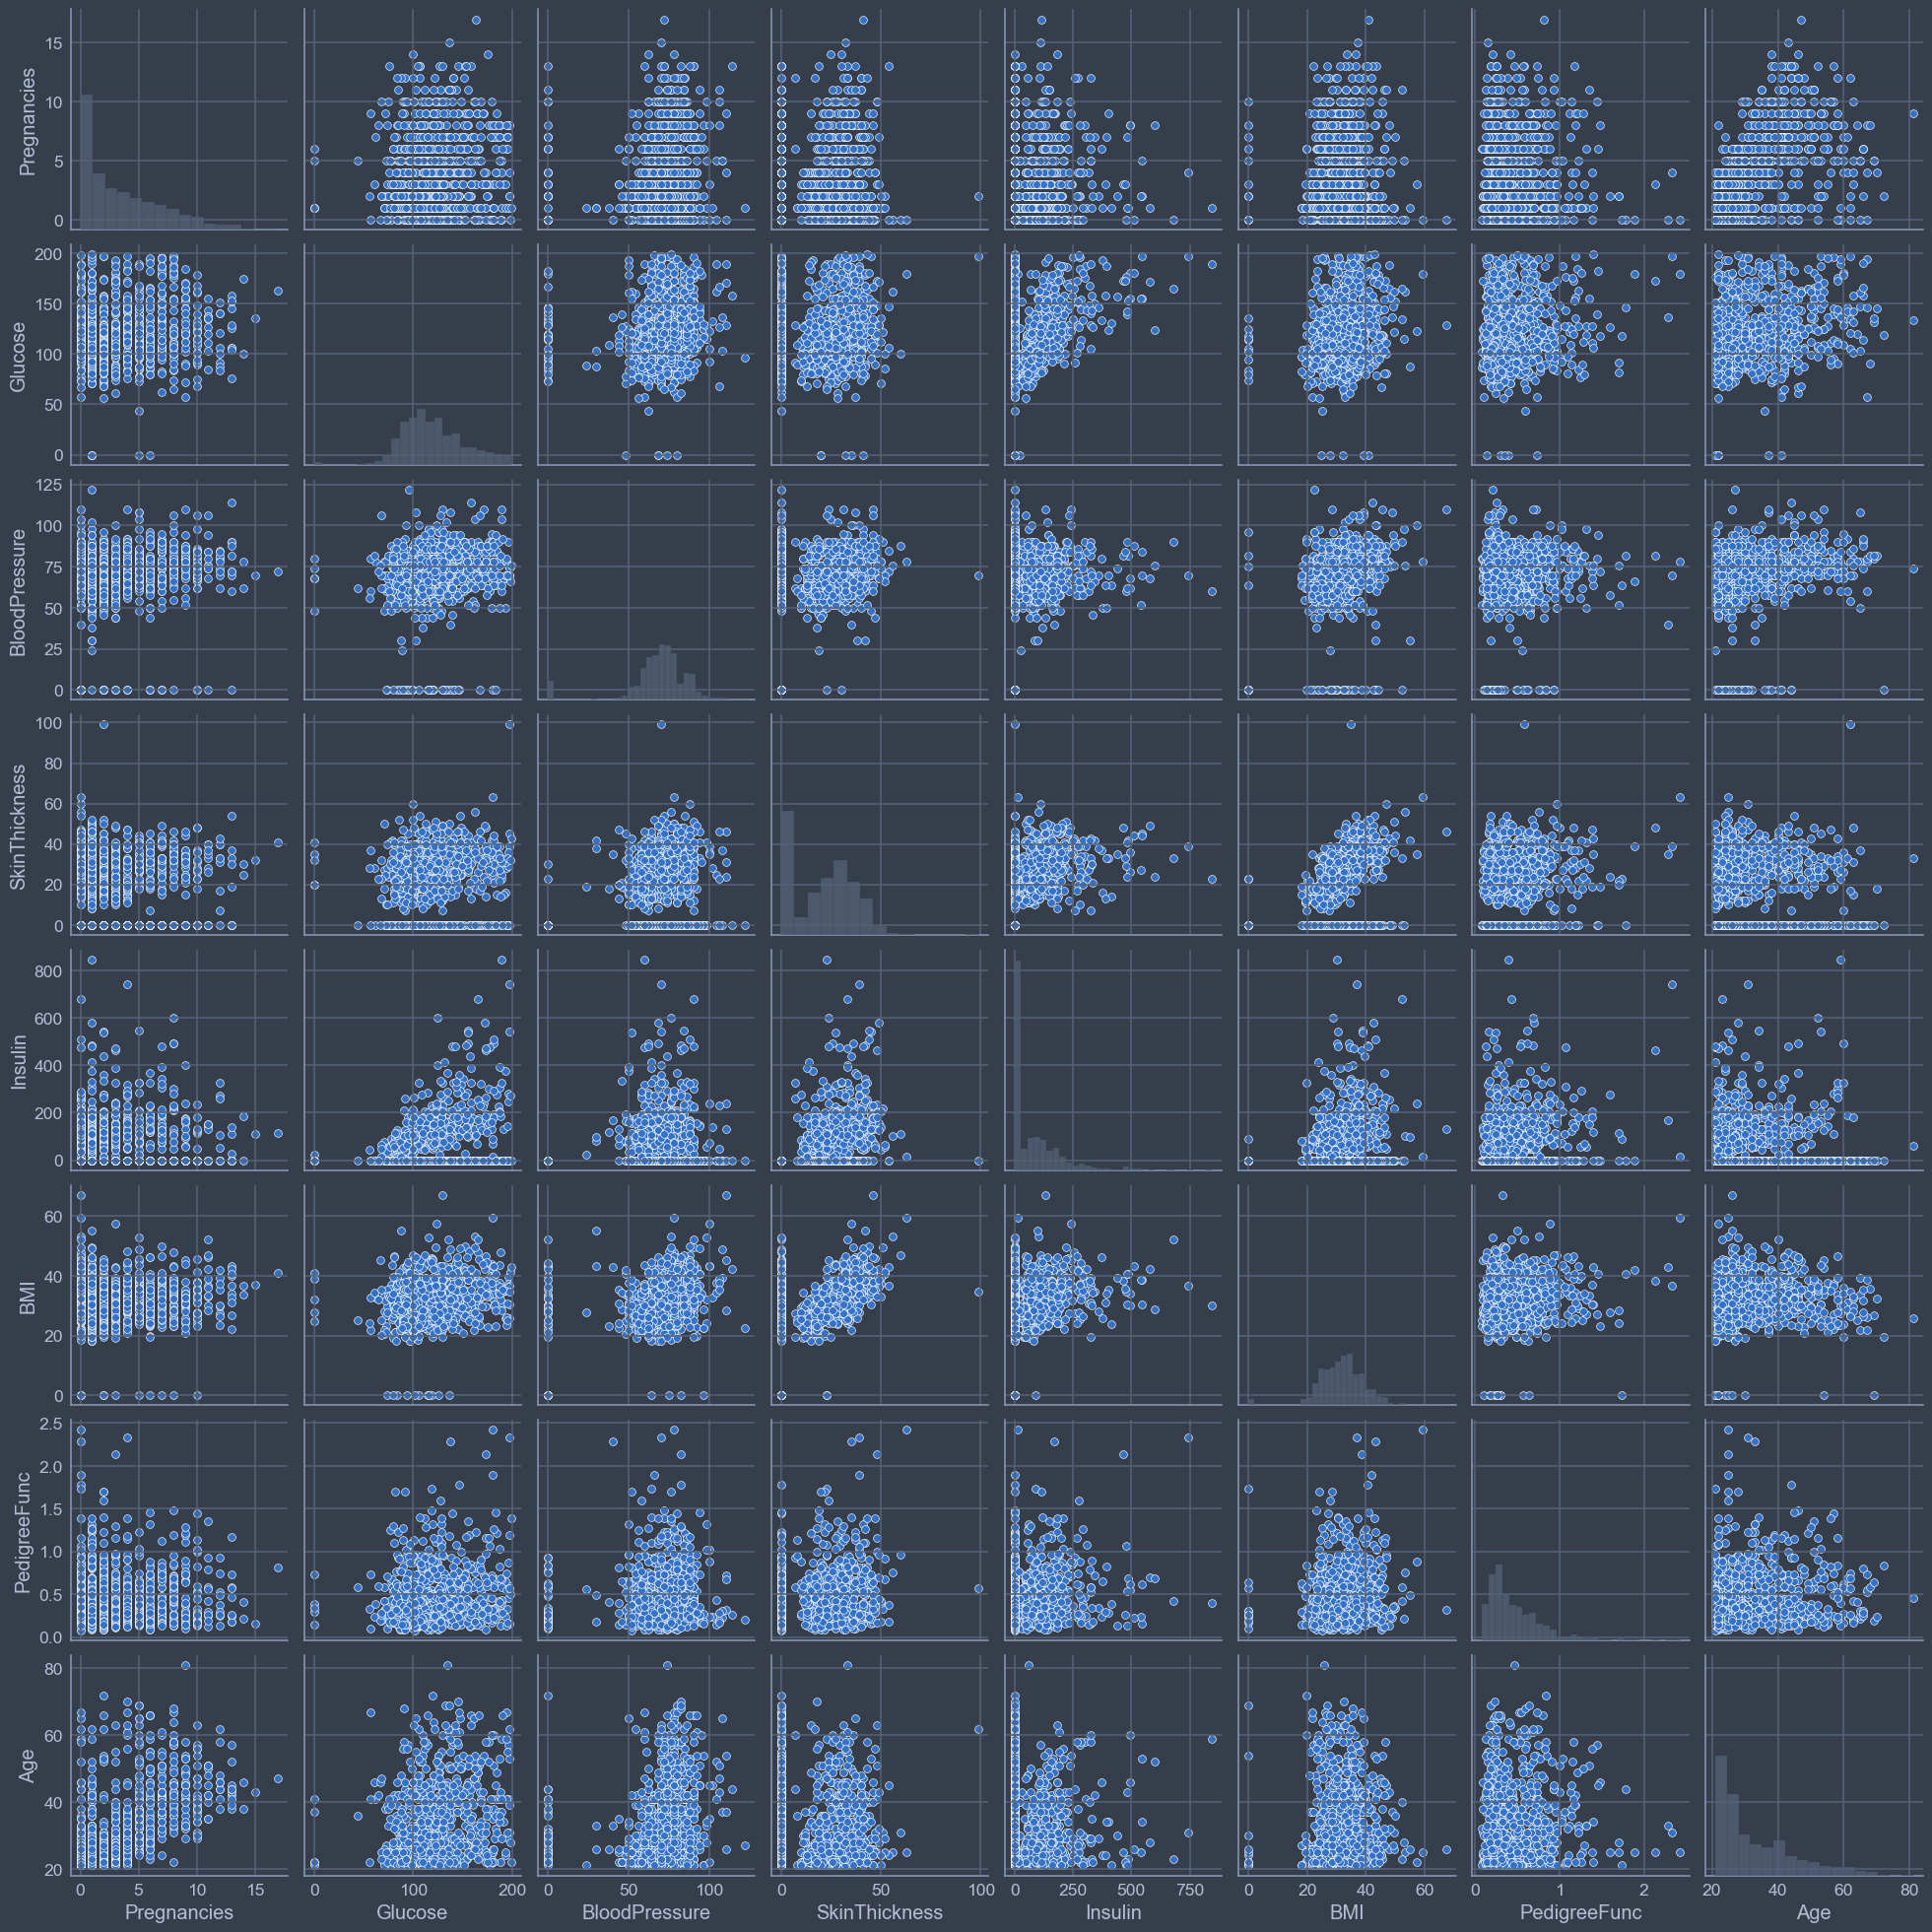

In [6]:
sns.pairplot(df.iloc[:,0:8])
plt.show()

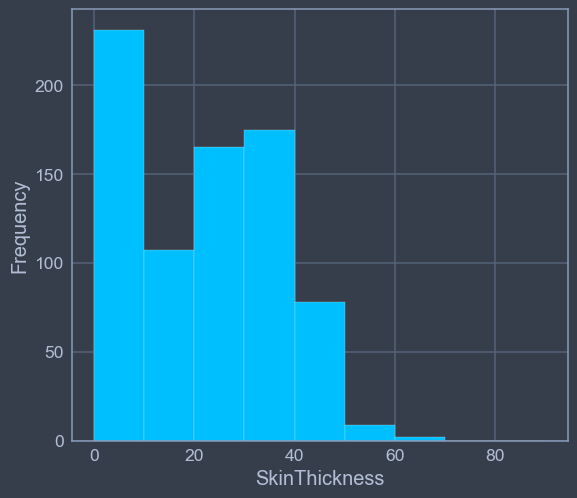

The appropriate number of bins are: 10


In [7]:
def bins(column):   
  # this function calculates the bin for the column you pass on the argument
  q= np.ceil(1 + 3.32 * np.log10(df[column].count()))
  R = df[column].max() - df[column].min()
  c = np.ceil(R/q)
  edg = np.arange(df[column].min(), df[column].max(), +10, c)
  return edg
  print(f"q: {q}\nR: {R}\nc: {c}\nedg: {edg}")

def histo(column):   #this function returns the graph of the column with its bins 
  edg = bins(column) 
  plt.hist(df[column], bins=edg, color='deepskyblue',edgecolor='white',zorder=2)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()
  print(f"The appropriate number of bins are: {len(edg)}") 

column = 'SkinThickness'
histo(column)

(120.89453125, 117.0, 99, 31.97261819513622, 99.0, 140.25)


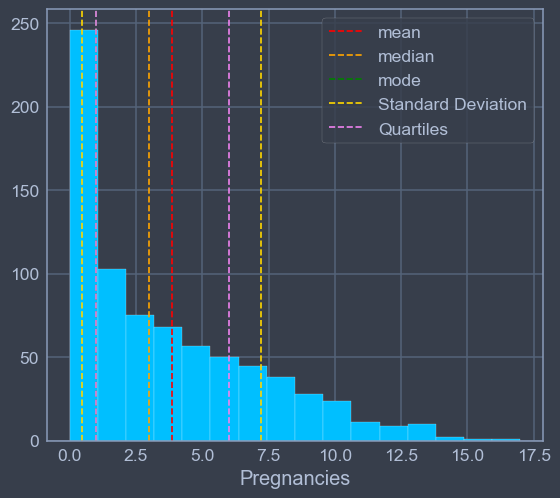

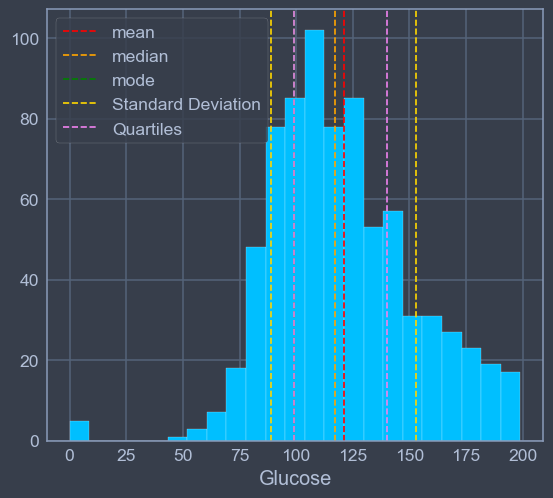

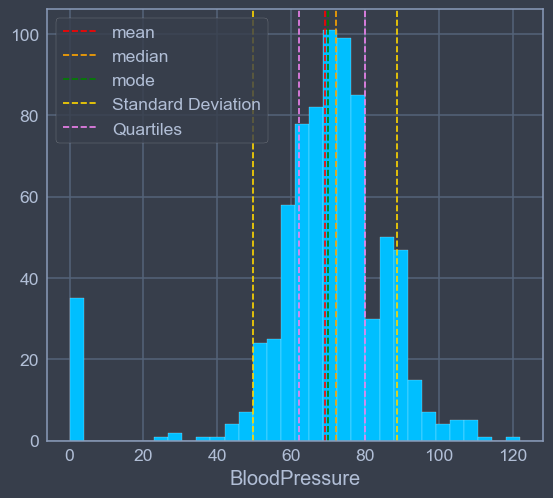

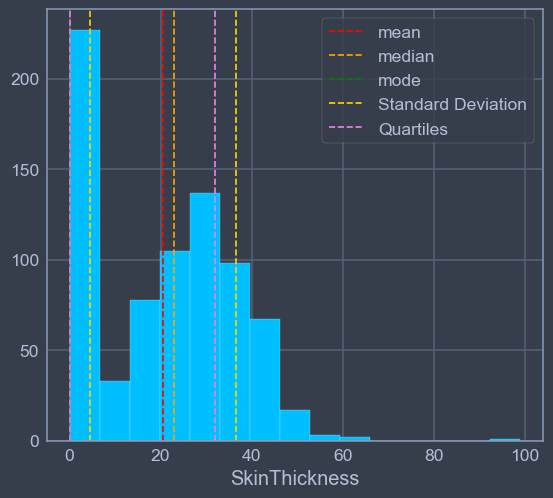

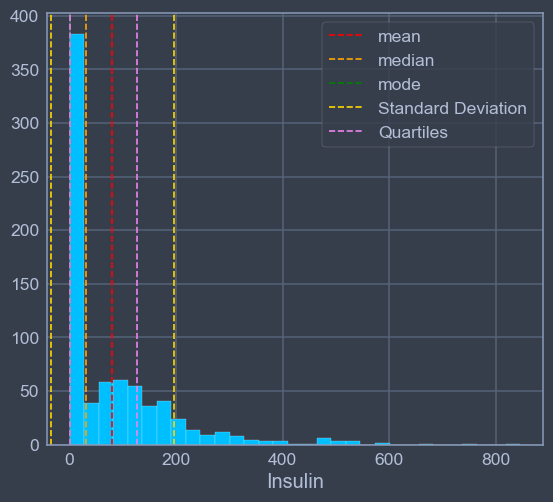

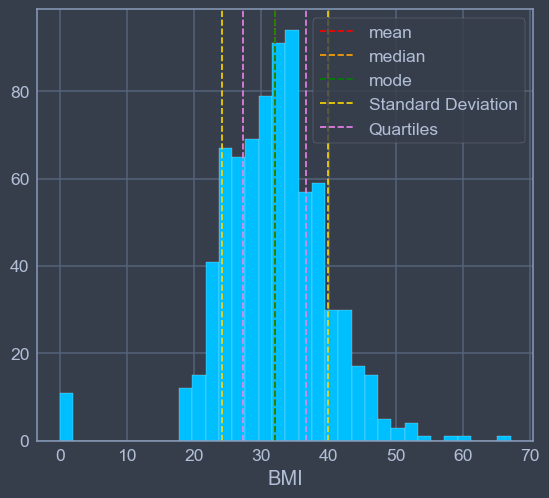

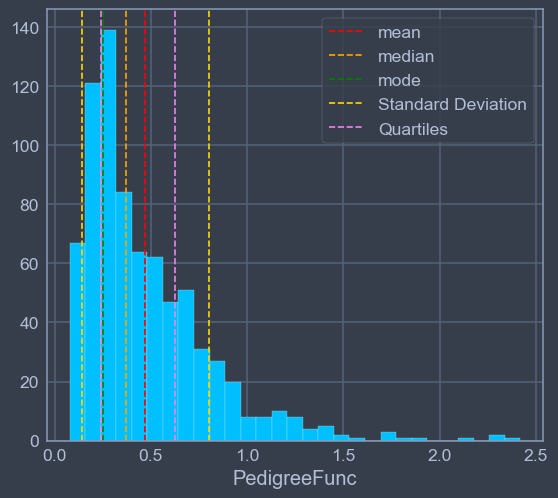

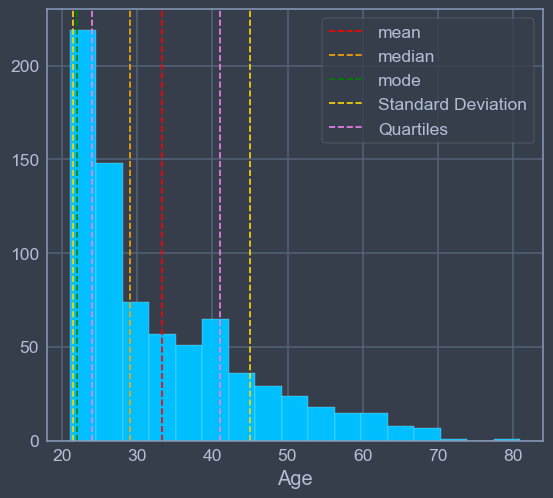

In [8]:
def statistic(measure):  
#this function calculates the bellow statistical measures for the given column
  mean = df[measure].mean()
  median = df[measure].median()
  mode = df[measure].mode()[0]
  std = df[measure].std()
  q1 = df[measure].quantile(0.25)
  q3 = df[measure].quantile(0.75)
  return mean, median, mode, std, q1, q3

print(statistic('Glucose'))

def stats_plot(measure):
  for plot in df_columns[:-1]:
    measure = plot
    mean, median, mode, std, q1, q3 = statistic(measure)

    plt.hist(df[measure], bins='auto', color='deepskyblue',edgecolor='white',zorder=2)
    plt.axvline(mean, color ='red', linestyle='dashed',label='mean')
    plt.axvline(median, color='orange',linestyle='dashed',label='median')
    plt.axvline(mode, color='green',linestyle='dashed',label='mode')
    plt.axvline(mean + std, color='gold', linestyle='dashed', label='Standard Deviation')
    plt.axvline(mean - std, color='gold', linestyle='dashed')
    plt.axvline(q1, color='violet', linestyle='dashed', label='Quartiles')
    plt.axvline(q3, color='violet', linestyle='dashed')
    plt.xlabel(measure)
    plt.legend()
    plt.show()

stats_plot('Glucose')

## **Plotting Correlations**

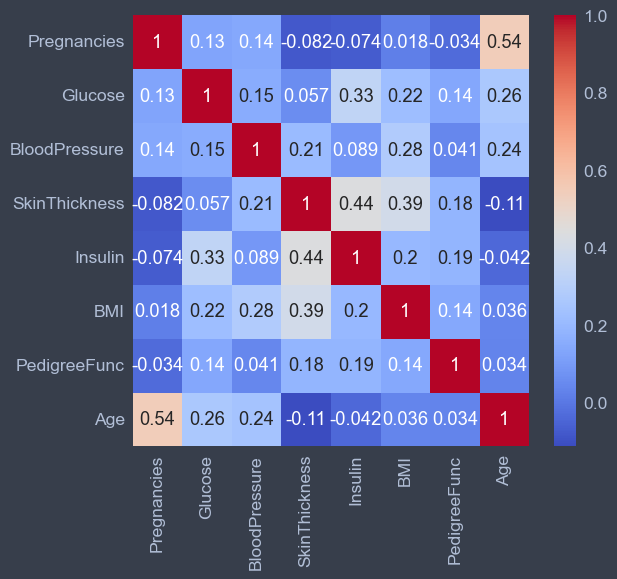

In [9]:
cor = df.iloc[:, :-1].corr()
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

## **Detecting Outliers**

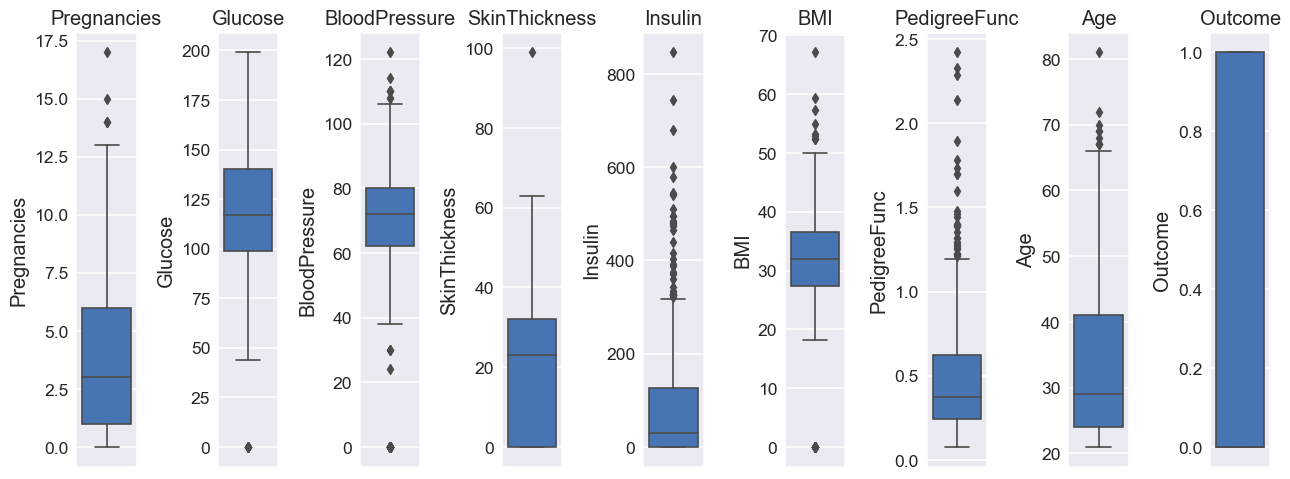

In [10]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, len(df.columns), figsize=(13, 5))
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## Data cleaning and outliers removal using InterQuartile Range (IQR) method 

In [11]:
df_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'PedigreeFunc',
 'Age',
 'Outcome']

In [12]:
df['SkinThickness'] = df['SkinThickness'].replace(df['SkinThickness'][df['SkinThickness'] > 90].mean())

In [13]:
for col in ['Glucose', 'BloodPressure', 'BMI','SkinThickness']:
    df = df[df[col] != 0]

df.shape

(531, 9)

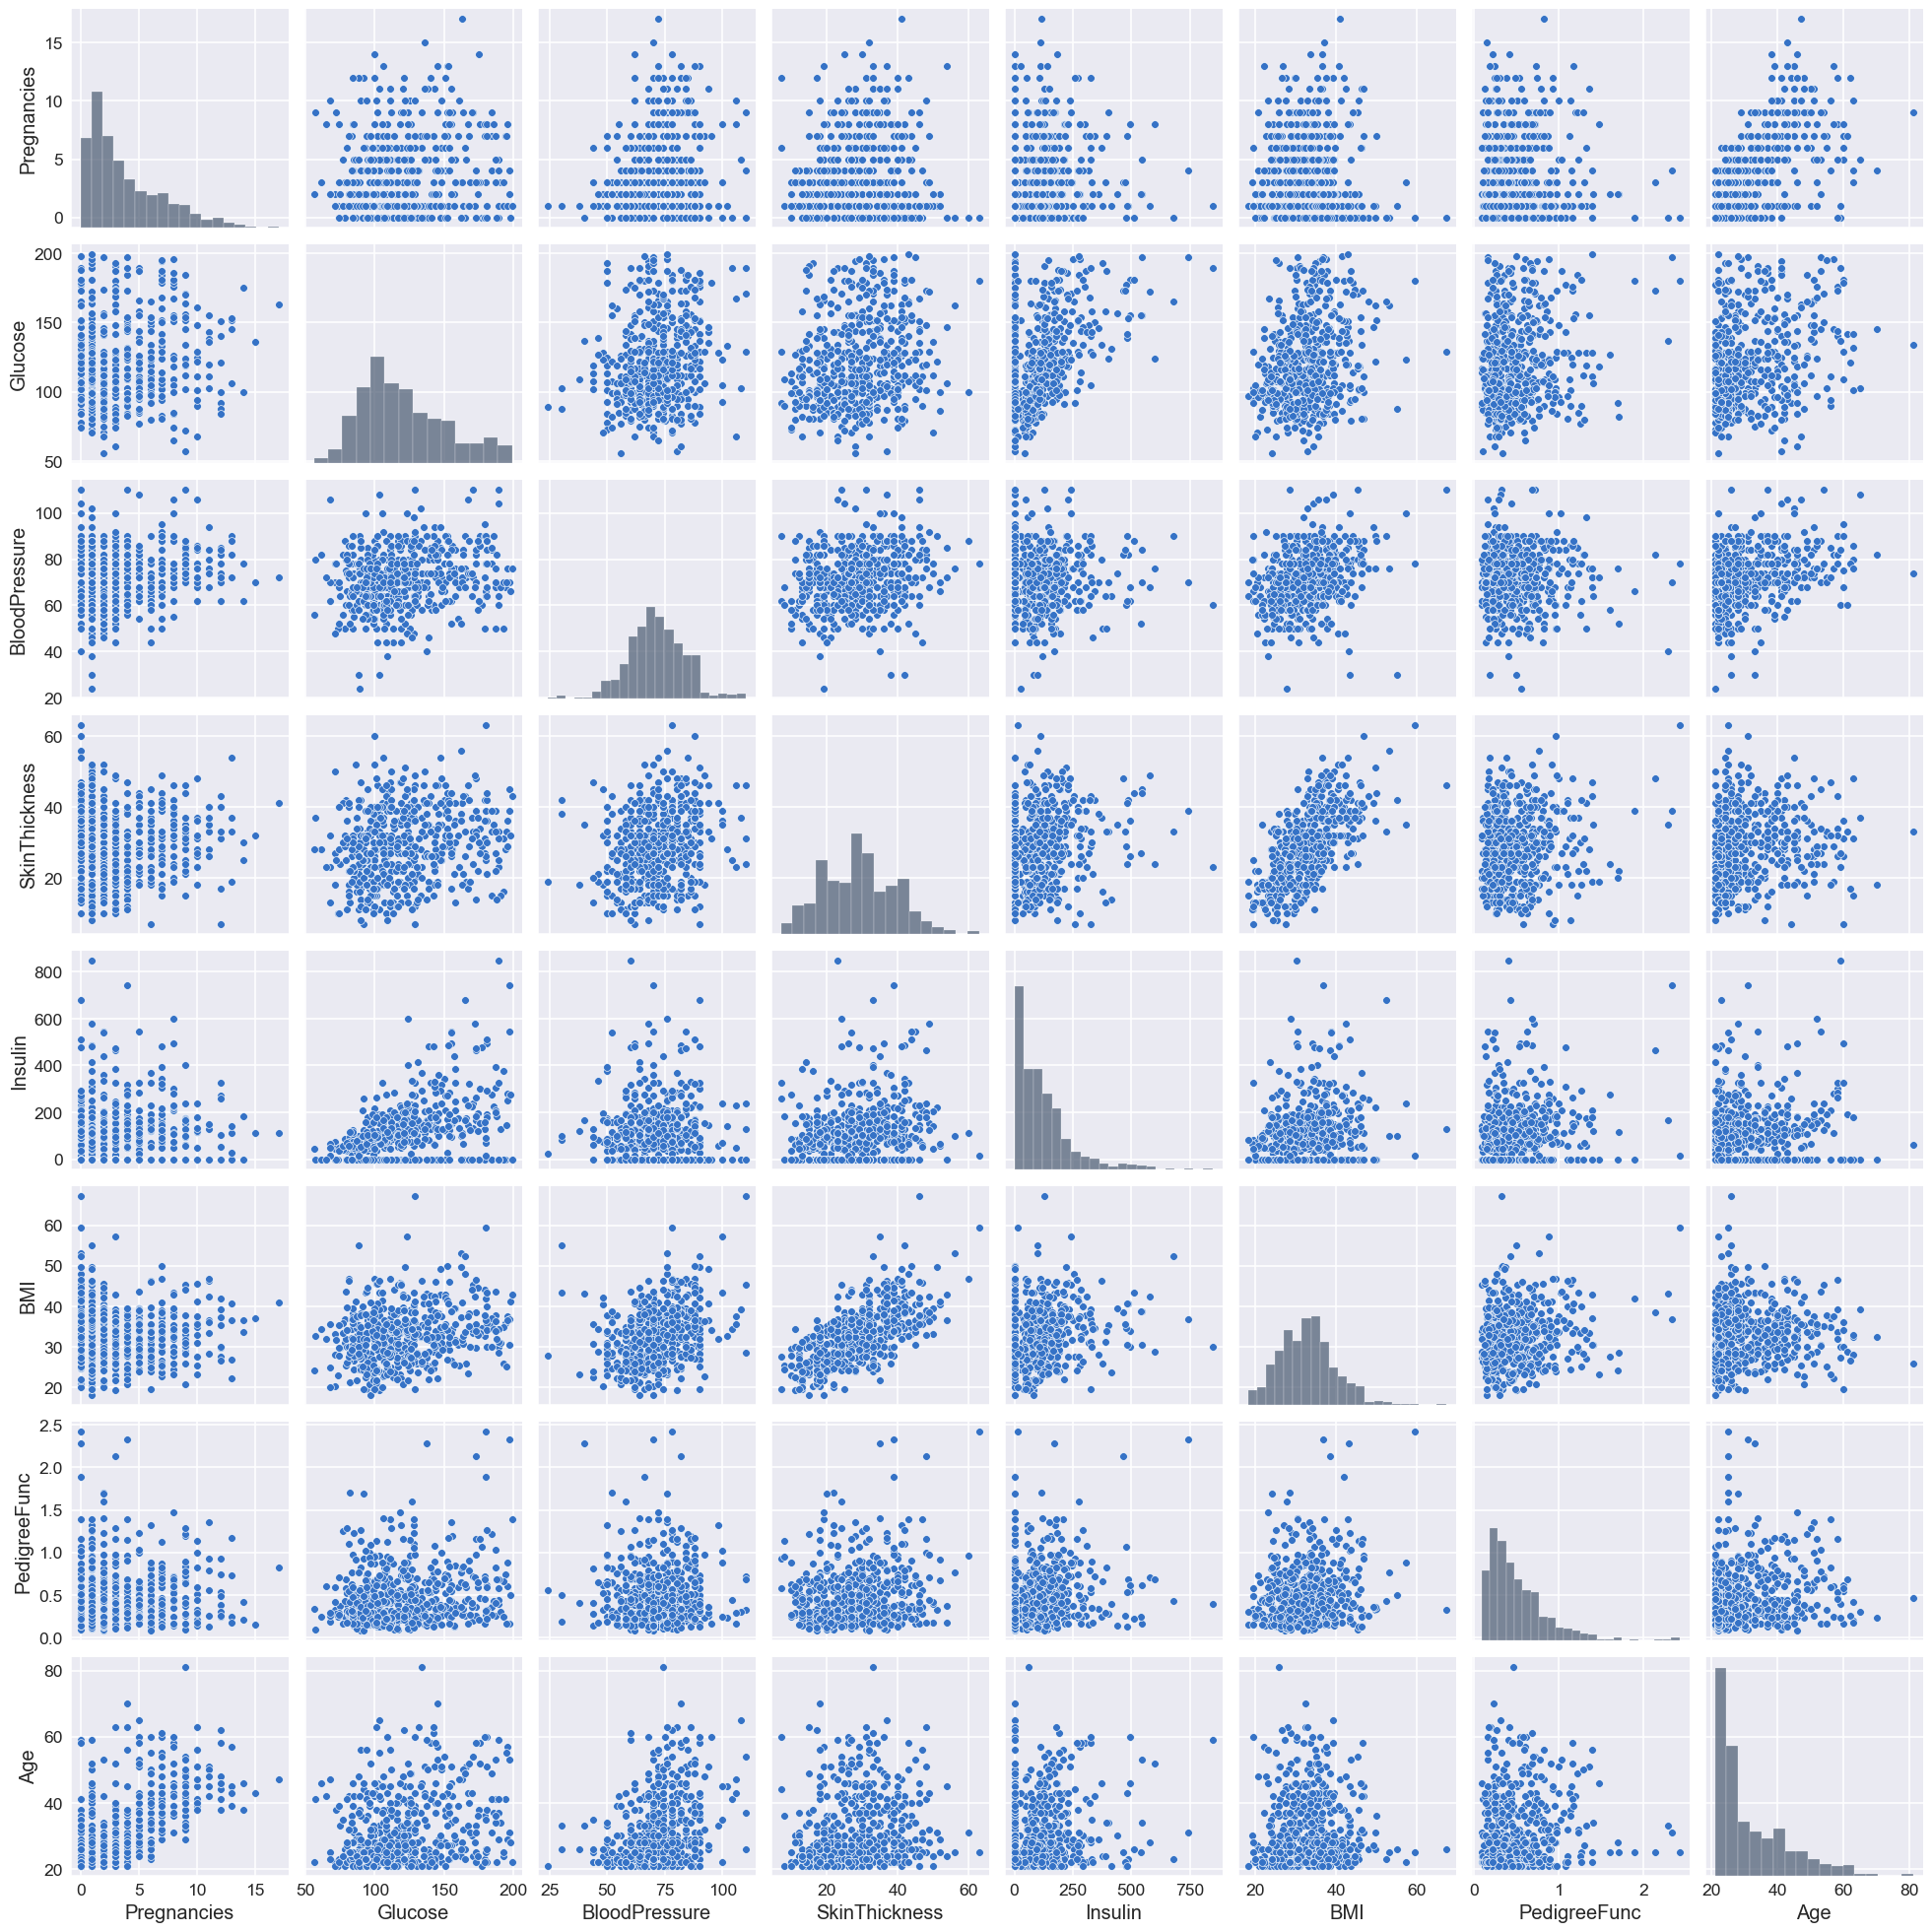

In [14]:
sns.pairplot(df.iloc[:,0:8])
plt.show()

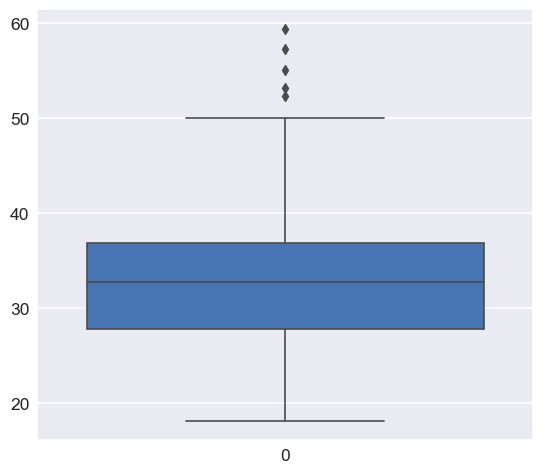

In [15]:
#When we call the remove_outliers function separately for each column, 
#the function is applied to each column independently. 
#This means that the upper and lower bounds for outlier removal are calculated
# separately for each column based on that column's data.
def remove_outliers(arg1, arg2, arg3,df=df):
    quant1 = df[arg1].quantile(arg2)
    quant3 = df[arg1].quantile(arg3)
    iqr = quant3 - quant1
    lower_bound = arg2
    upper_bound = quant3 + 1.5 * iqr
    outliers = (df[arg1] < lower_bound) | (df[arg1] > upper_bound)
    df.loc[outliers, arg1] = df[arg1].mean()
    return df
#every time we call the function, it removes the outlier for the column
#but if we call it for another column, the previous outlier removal will
#be reseted. ( independently removes )
clean_df = remove_outliers("BMI",0.10, 0.85)

sns.boxplot(data=clean_df["BMI"])
plt.show()

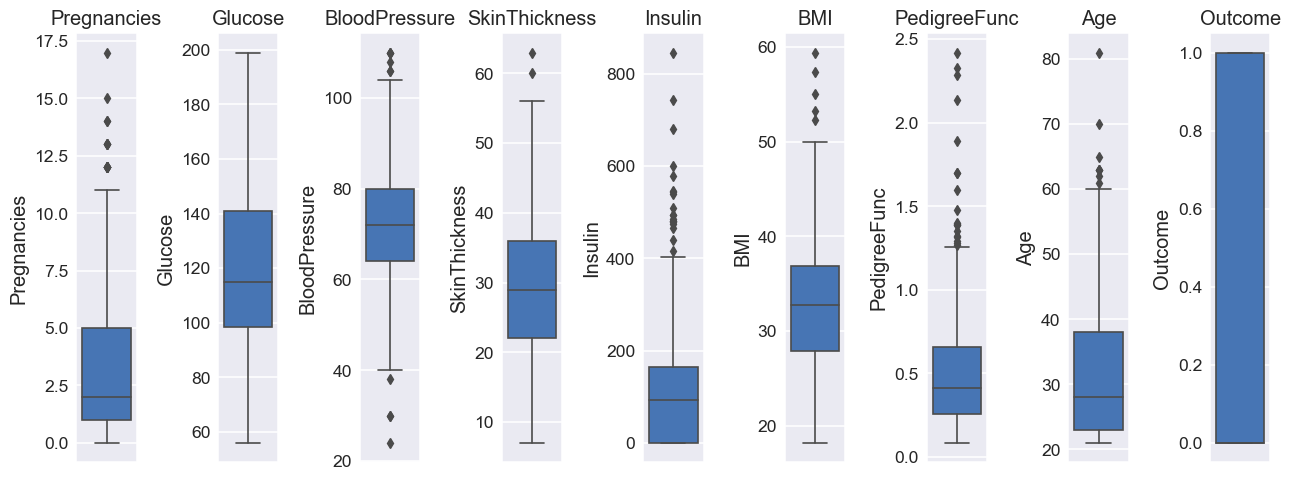

In [16]:
fig, axes = plt.subplots(1, len(df.columns), figsize=(13, 5))
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

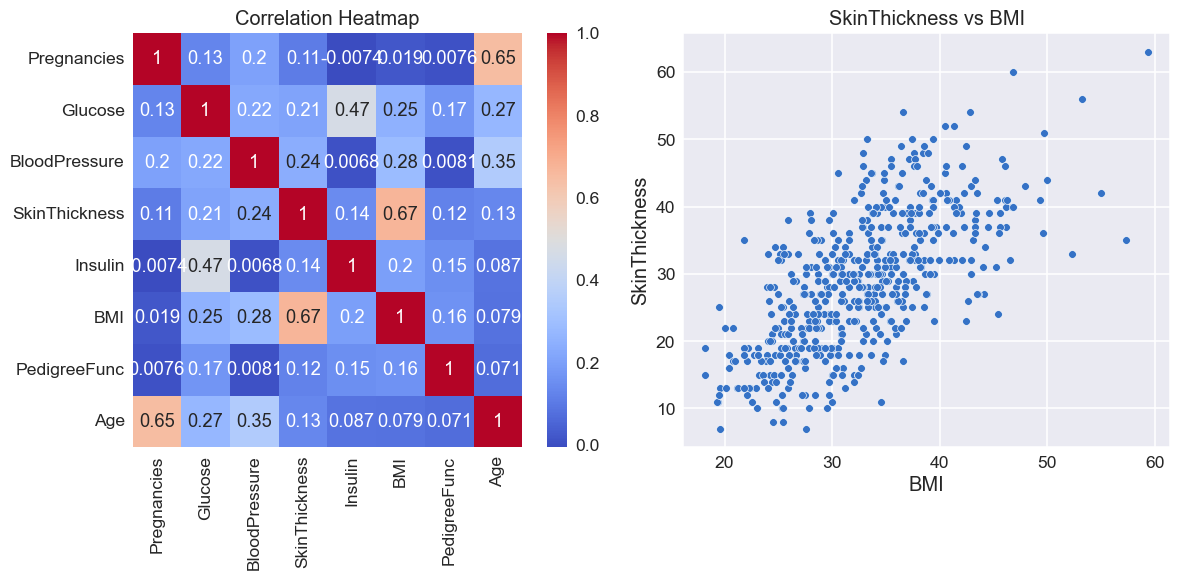

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

cor = df.iloc[:, :-1].corr()
sns.heatmap(cor, cmap="coolwarm", annot=True, ax=axs[0])
axs[0].set_title('Correlation Heatmap')

sns.scatterplot(data=df, x="BMI", y="SkinThickness", ax=axs[1])
axs[1].set_title('SkinThickness vs BMI')

plt.tight_layout()

plt.show()

## **Linear Regression** 

First simple model with no transformations

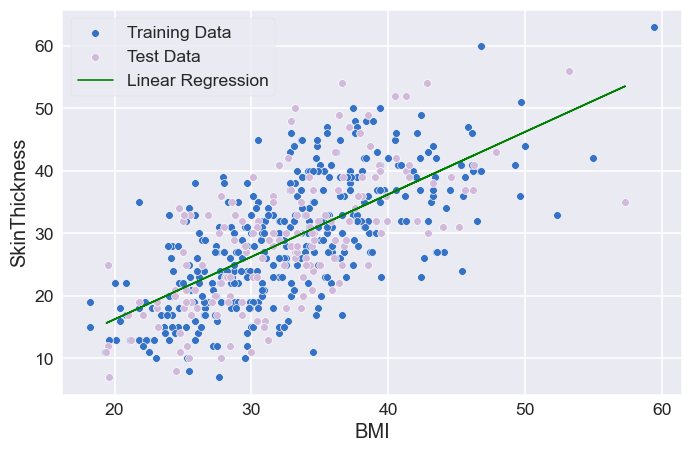

In [18]:
X = df['BMI'].values.reshape(-1, 1)  # Reshape to a 2D array
y = df['SkinThickness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr_model = LinearRegression() # our model
lr_model.fit(X_train, y_train) # we pass the train data

y_pred = lr_model.predict(X_test) # we predict the test set

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train.flatten(), y=y_train, label='Training Data')
sns.scatterplot(x=X_test.flatten(), y=y_test, color='#D0B9DA', label='Test Data')
plt.plot(X_test.flatten(), y_pred, color='green', label='Linear Regression')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.show()

We will performe linear regression on 'BMI' as the independent variable (x_value) and 'Skinthickness' as the dependent variable (y_value). The dataset is split into training ( 70% of the data ) and testing ( 30% of the data). The training set is used to fit a Linear Regression model and estimate values for the testing set.

Two scatter plots are generated, one for the training data and the other for the testing data,were every dot is a representation of a BMI value and a Gluvose value. Both plots have 'BMI' on the x-axis and 'Glucose' on the y-axis. In each plot, the black line represents the line of best fit generated by the Linear Regression model.

If the model fits the data well, the points on the scatter plot will be closely clustered around the line of best fit.

## **Normalization**

In [19]:
normalized_df = pd.DataFrame(normalize(df), columns=df.columns)

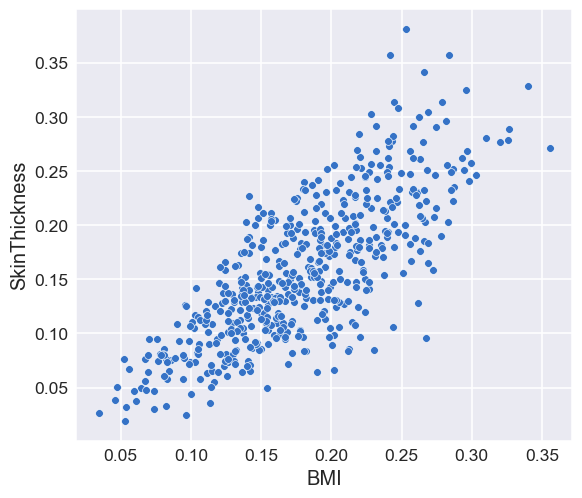

In [20]:

sns.scatterplot(data=normalized_df,x="BMI",y="SkinThickness")
plt.show()

**Building a model for the normalized data and the original data**

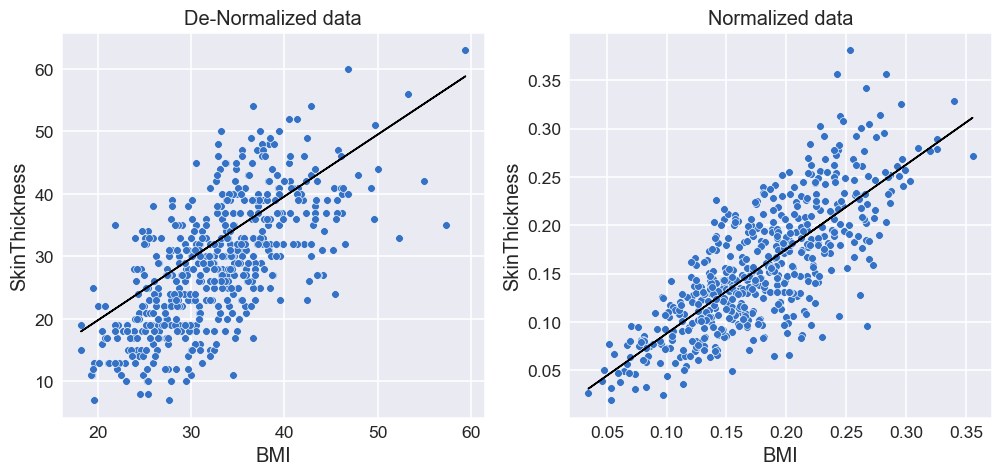

slope 0.873326351107994
intercept 0.0007294409476416773
Normalized: y = 0.873326351107994 * x + 0.0007294409476416773
_________________________________________________________________
slope 0.990409589053518
intercept -0.020138420197481882
De-Normalized: y = 0.990409589053518 * x + -0.020138420197481882


In [21]:
p = np.polyfit(normalized_df["BMI"],normalized_df["SkinThickness"],1)
slope = p[0]
intercept = p[1]
# de-normalize the slope and intercept
slope2 = slope * (normalized_df["SkinThickness"].std() / normalized_df["BMI"].std())
intercept2 = intercept * normalized_df["SkinThickness"].std() + normalized_df["SkinThickness"].mean() - slope2 * normalized_df["BMI"].mean()

# this function is referred to the de-normalized data
def line(x): 
   return slope2*x + intercept2

# this function is referred to the normalized data
def reg(x): 
   return slope*x + intercept

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
predicted_skin_thic = line(df["BMI"])
sns.scatterplot(data=df, x="BMI",y="SkinThickness")
plt.plot(df["BMI"], predicted_skin_thic, color = "black")
plt.title("De-Normalized data")
plt.xlabel("BMI")
plt.ylabel("SkinThickness")


plt.subplot(1, 2, 2)
predicted_thick = reg(normalized_df["BMI"]) 
sns.scatterplot(data=normalized_df, x="BMI",y="SkinThickness")
plt.plot(normalized_df["BMI"], predicted_thick, color = "black")
plt.title("Normalized data")
plt.xlabel("BMI") 
plt.ylabel("SkinThickness")
plt.show()


print(f"slope {p[0]}")
print(f"intercept {p[1]}") 
print(f"Normalized: y = {slope} * x + {intercept}")
print("_________________________________________________________________")
print(f"slope {slope2}")
print(f"intercept {intercept2}")
print(f"De-Normalized: y = {slope2} * x + {intercept2}")

In [22]:
# what is the skin thickness if your body mass index equals to 65? 
print(reg(65))

56.76694226296725


## **Evaluation metrics**

In [23]:
print("De-normalized data")
y_predicted = line(df["BMI"])  #predicted values
residuals = df["SkinThickness"] - y_predicted 

RSS = np.sum(residuals**2) # sum of squares
n = len(df)
k = 2 # parameters
AIC =  2 * k - 2* np.log(RSS/n)
print("AIC: ", AIC.round(3) )

#_____________________________________________________________
MSE = mean_squared_error(df["SkinThickness"],y_predicted).round(3)
print("MSE: ", MSE.round(2))

#_____________________________________________________________
BIC = k *np.log(n) - 2 * np.log(RSS/n)
print("BIC: ", BIC.round(3))

#_____________________________________________________________
x_mean = df["BMI"].mean()
y_mean = df["SkinThickness"].mean()

total_sum_of_squares=np.sum(( df["SkinThickness"] - y_mean)**2)
sum_of_squares_of_residuals = np.sum(df["SkinThickness"] - (slope2 * predicted_skin_thic + intercept2)**2) 

R_squared =  1 - (sum_of_squares_of_residuals / total_sum_of_squares).round(3)
print("R_squared:", R_squared.round(2))

De-normalized data
AIC:  -4.421
MSE:  67.41
BIC:  4.128
R_squared: 11.32


These evaluation metrics provide information about the performance and quality of our model.

1.   AIC (Akaike Information Criterion): AIC is a measure used for model selection, where lower values indicate a better model. It takes into account both the goodness of fit and the complexity of the model. In our case, the AIC value of -4.421 suggests that our model is performing well, as it indicates a relatively low value.

2.   MSE (Mean Squared Error): MSE is a commonly used metric to measure the average squared difference between the predicted and actual values. It quantifies the overall accuracy of our model's predictions, where lower values indicate better performance. In our case, the MSE value of 67.41 suggests that, on average, the squared difference between our model's predictions and the actual values is relatively high.


3.   BIC (Bayesian Information Criterion): BIC, similar to AIC, is an information criterion used for model selection. Like AIC, lower BIC values indicate a better model. In our case, the BIC value of 4.128 suggests that our model is performing well and has relatively low complexity.

4.   R-squared (coefficient of determination): R-squared measures the proportion of the variance in the dependent variable that can be explained by the independent variables in our model. It ranges from 0 to 100%, where higher values indicate a better fit. In our case, the R-squared value of 11.32 suggests that our model explains approximately 11.32% of the variance in the dependent variable, indicating a relatively weak fit to the data.





In [24]:
print("Normalized data")
y_predicted2 = reg(normalized_df["BMI"])  #predicted values
residuals2 = normalized_df["SkinThickness"] - y_predicted2  
RSS2 = np.sum(residuals2**2) # sum of squares
n2 = len(normalized_df)
AIC2 =  2 * k - 2* np.log(RSS2/n2)
print("AIC: ", AIC2.round(3))

#_____________________________________________________________
MSE2 = mean_squared_error(normalized_df["SkinThickness"],y_predicted2)
print("MSE: ", MSE2.round(5))

#_____________________________________________________________
BIC2 = k *np.log(n2) - 2 * np.log(RSS2/n2)
print("BIC: ", BIC2.round(3))

#_____________________________________________________________
x_ = normalized_df["BMI"].mean()
y_ = normalized_df["SkinThickness"].mean()

total_sum_of_squares2=np.sum(( normalized_df["SkinThickness"] - y_)**2)
sum_of_squares_of_residuals2 = np.sum(normalized_df["SkinThickness"] - (slope * predicted_thick + intercept)**2) 

R_squared2 =  1 - (sum_of_squares_of_residuals2 / total_sum_of_squares2)
print("R_squared:", R_squared2 )

Normalized data
AIC:  16.715
MSE:  0.00173
BIC:  25.265
R_squared: -30.90308065752065


On the other hand if we normalize our data we have:


1.  AIC (Akaike Information Criterion) value of 12.0144 suggests that our model may not be the best fit for the data, as it exhibits a relatively higher value compared to other potential models. This implies that there may be other models that could offer a better balance between goodness of fit and complexity.
2.    The MSE value of 0.0182 suggests that, on average, the squared difference between our model's predictions and the actual values is relatively low.

3.   The BIC value of 21.2357 also indicates that our model might not be the best fit for the data, as it has a relatively higher value. 
4.   The R-squared value of 40.4583 suggests that our model explains approximately 40.46% of the variance in the dependent variable. This indicates that it may not capture a substantial amount of the variability present in the normalized data.




In [36]:
my_metrics = [["name", "de_normalized_data", "normalized_data" ],
           ["AIC", AIC.round(2),AIC2.round(2)],
           ["MSE",MSE.round(2), MSE2],
           ["BIC",BIC.round(2), BIC2.round(2)],
           ["R^2",R_squared,R_squared2]]
metrics = pd.DataFrame(my_metrics[1:], columns=my_metrics[0])
metrics

,name,de_normalized_data,normalized_data
0,AIC,-4.420,16.720000
1,MSE,67.410,0.001733
2,BIC,4.130,25.270000
3,R^2,11.323,-30.903081


Based on the provided information, it appears that the de-normalized data performs better in terms of AIC, MSE, and BIC, as it has lower values for AIC and BIC and a higher MSE value. Additionally, the R-squared value for the de-normalized data (11.323) is higher than the R-squared value for the normalized data (-30.903081).

However, it's important to consider other factors as well, such as the assumptions of the models and the diagnostic plots.

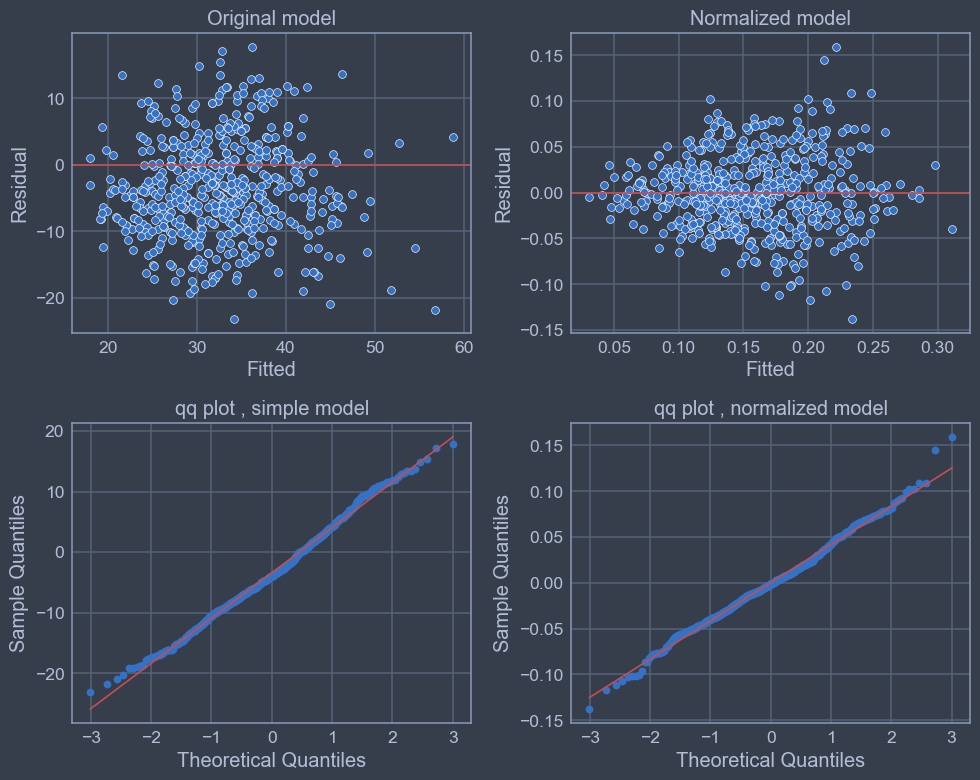

In [31]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x=y_predicted, y=residuals)
plt.axhline(y=0, color='r', linestyle='-' )
plt.title('Original model')
plt.xlabel('Fitted')
plt.ylabel('Residual')

plt.subplot(2, 2, 2)
sns.scatterplot(x=y_predicted2, y=residuals2)
plt.axhline(y=0, color='r', linestyle='-' )
plt.title('Normalized model')
plt.xlabel('Fitted')
plt.ylabel('Residual')

#qqplot for original model 
plt.subplot(2, 2, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('qq plot , simple model')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

#qq plot for normalized model
plt.subplot(2, 2, 4)
stats.probplot(residuals2, dist="norm", plot=plt)
plt.title('qq plot , normalized model')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()



Residuals of normalized data have heteroscedasticity , meaning their variance spreads . The assumption of normality is also violated for the normalized model

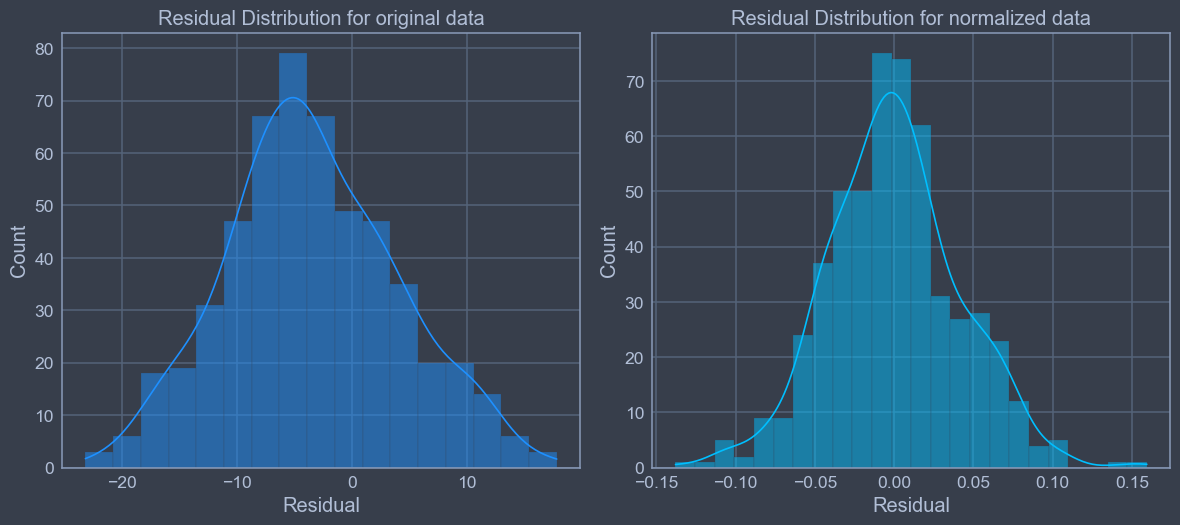

In [40]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(residuals, kde=True, color='dodgerblue')
plt.title('Residual Distribution for original data')
plt.xlabel('Residual')

plt.subplot(2, 2, 2)
sns.histplot(residuals2, kde=True, color='deepskyblue')
plt.title('Residual Distribution for normalized data')
plt.xlabel('Residual')

plt.tight_layout()
plt.show()

The residuals of normalized model do not follow a normal distribution 

In this case, despite the better performance in terms of some metrics for the de-normalized data, the normalized model violates assumptions and shows problematic diagnostic plots, it might not be the best choice. It's essential to consider the overall performance of the model, including its ability to meet assumptions and provide reliable predictions. Therefore, further investigation and possibly model refinement may be necessary to determine the best model.